# ACCESS TO AFFORDABLE FINANCE PROJECT DOCUMENTATION

Author: **Anidu Yakubu Khalid**   
Email: aniduyakubu@gmail.com  
Project completion date: 15/05/2025

## Introduction  


Access to affordable finance is a crucial enabler for economic empowerment, particularly for youth and small-scale agripreneurs in Nigeria. Despite the critical role that financial services play in stimulating economic growth and reducing poverty, many Nigerians face significant barriers due to limited access to formal financial institutions and high credit risk. This project aims to leverage data and technology to measure financial access and credit performance, and ultimately to inspire innovative solutions to expand financial inclusion in Nigeria.

We **begin the analysis** by importing the necessary libraries, loading the dataset directly from Google Drive, and displaying the first five rows to get an overview of the data structure.

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [2]:
# Reading the data from my google drive folder and displaying the first 5 records/rows
import requests
import pandas as pd
from io import StringIO
def read_gd(sharingurl):
    file_id = sharingurl.split('/')[-2]
    download_url='https://drive.google.com/uc?export=download&id=' + file_id
    url = requests.get(download_url).text
    csv_raw = StringIO(url)
    return csv_raw

url = "https://drive.google.com/file/d/1LIh0u_EfZfbKHMpqOhozEHNMk-KOqX0m/view?usp=sharing"
gdd = read_gd(url)

df = pd.read_csv(gdd)

df.head()

<ipython-input-2-09d0f177854c>:15: DtypeWarning: Columns (0,2,4,5,6,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(gdd)


,e6,state,agegroup,age group,respondent_serial,Weightingvariable,final_hh_wgt,lga_name,locality_name,ea_name,...,d1_house,d3_8_car,sa7b1_1,sa7b1_2,sa7b1_3,sa7b1_4,sa7b1_5,sa7b1_6,have_investment,rm2b_insurance
0,2,ABIA,2,Above 18,3697287,686.9920654,749.888855,UMUAHIA SOUTH,UMUORAM OHIYA,JESUS GOSPEL MANIFESTATION OF POWER &HEALING M...,...,1,0,2.0,2.0,2.0,2.0,2.0,2.0,0,
1,2,ABIA,2,Above 18,3546312,1292.105957,1028.419067,OBI NGWA,OWOAHIAFOR,DEEPER LIFE BIBLE CHURCH OWOAHIAFOR,...,1,0,2.0,2.0,2.0,2.0,2.0,2.0,0,
2,1,ABIA,2,Above 18,3737095,274.3084106,492.7841187,UMU-NNEOCHI,AMAKPOKE,AMAKPOKE HEALTH CENTRE UMUAKU,...,1,0,1.0,2.0,2.0,2.0,2.0,2.0,1,
3,1,ABIA,2,Above 18,3545118,1194.71936,1028.419067,OBI NGWA,OWOAHIAFOR,DEEPER LIFE BIBLE CHURCH OWOAHIAFOR,...,1,0,2.0,2.0,2.0,2.0,2.0,2.0,0,
4,1,ABIA,2,Above 18,3705829,4107.366211,1906.860229,OHAFIA,UKWA NKPORO,EME UKA UKA,...,1,0,2.0,2.0,2.0,2.0,2.0,2.0,0,


In [3]:
## setting the notebook to display all required columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Exploratory Data Analysis

In [4]:
df.shape

(28399, 104)

28399 columns and 104 rows

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28399 entries, 0 to 28398
Columns: 104 entries, e6 to rm2b_insurance
dtypes: float64(55), int64(2), object(47)
memory usage: 22.5+ MB


In [6]:
df.describe()

,fparticipants,banked,fas,wealthscore,fas_overlaps,saving_strand,credit_strand,remittances_strand,insurance_strand,investments_physical_assets,investments_capital_markets,mobile_money,financial_agents,transactional_acc,finhealth_spend,finhealth_save,finhealth_plan,finhealth_resilience,finhealth_access,finlit_control,finlit_planning,finlit_choice,finlit_knowledge,finneeds_goals,finneeds_liquidity_distress,finneeds_liquidity,finneeds_resilience,finneeds_tov_income,finneeds_tov_digitalincome,finneeds_tov_cashincome,finneeds_tov_remittances,finneeds_tov_digital_remittances,finneeds_tov_cash_remittances,finneeds_tov_merchant_digital_pa,finneeds_tov_digital,finneeds_transferofvalue,target_groups,savings_group,cooperative,village_comm_association,savings_thrift,finhealth_indicator_final,finlit_cap_final,te4a-phone_net,lc1_1,lc1_2,lc1_3,lc1_4,lc1_5,have_debt,sa7b1_1,sa7b1_2,sa7b1_3,sa7b1_4,sa7b1_5,sa7b1_6,have_investment
count,28384.000000,28384.000000,28384.000000,28384.000000,28384.000000,28384.000000,28384.000000,28384.000000,28384.000000,28384.000000,28384.000000,28384.000000,28384.000000,28384.000000,28384.000000,28384.000000,28384.000000,28384.000000,28384.000000,28384.000000,28384.000000,28384.000000,28384.000000,28384.000000,28384.00000,28384.000000,28384.000000,28384.000000,28384.000000,28384.000000,28384.000000,28384.000000,28384.000000,28384.000000,28384.000000,28384.0,28384.000000,28384.000000,28384.000000,28384.000000,28384.000000,28384.000000,28384.000000,28392.000000,28387.000000,28387.000000,28387.000000,28387.000000,28387.000000,28399.000000,28387.000000,28387.000000,28387.000000,28387.000000,28387.000000,28387.000000,28399.000000
mean,1.224246,1.503206,30.656708,0.225794,31.856821,43.132610,68.331067,41.448633,96.431229,1.480729,1.960471,0.108195,0.515114,49.628417,0.664600,0.864924,0.911852,0.671822,0.235978,1.069581,1.044532,1.058378,0.957723,1.186654,1.46195,1.179890,1.484956,1.151952,0.156003,1.165093,0.592094,0.329622,0.512895,0.387859,0.428199,1.0,3.087655,0.094032,0.049958,0.126691,0.119997,0.775225,0.789318,1.307094,1.750273,1.909219,1.903125,1.936379,1.942474,0.302018,1.725332,1.712016,1.593863,1.971571,1.989326,1.990277,0.521603
std,0.417092,0.499999,44.707577,2.916758,43.955146,47.973164,44.620218,47.777912,15.657255,0.499637,0.194854,0.310632,0.499780,48.579652,0.782363,0.686031,0.744389,0.826149,0.542439,0.756784,0.756415,0.890675,0.900099,0.389641,0.77997,0.384103,0.499782,0.358980,0.362865,0.371271,0.491454,0.470084,0.499843,0.487271,0.494826,0.0,1.389964,0.291878,0.217861,0.332632,0.324964,0.679783,0.744500,0.507818,0.432863,0.287302,0.295793,0.244080,0.232850,0.459141,0.446355,0.452832,0.491119,0.166197,0.102764,0.098125,0.499542
min,1.000000,1.000000,1.000000,-3.933216,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,1.000000,-2.371000,2.000000,1.000000,4.000000,1.000000,99.000000,1.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000
50%,1.000000,2.000000,2.000000,-0.289888,5.000000,4.000000,99.000000,4.000000,99.000000,1.000000,2.000000,0.000000,1.000000,3.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.000000,1.0

In [7]:
## checking for missing values
df.isnull().sum()

,0
e6,0
state,0
agegroup,0
age group,0
respondent_serial,0
Weightingvariable,0
final_hh_wgt,0
lga_name,0
locality_name,0
ea_name,0


Some columns have missing values

In [8]:
## Checking for duplicates
df.duplicated().sum()

np.int64(5)

In [9]:
df[df.duplicated()]

,e6,state,agegroup,age group,respondent_serial,Weightingvariable,final_hh_wgt,lga_name,locality_name,ea_name,landmark,hh_total_size_1,hh_total_size_2,hh_total_size_3,fparticipants,pension,banked,other_f,informal,fas,wealthscore,fas_overlaps,savings_b,savings_f,savings_inf,savings_ah,saving_strand,credit_b,credit_f,credit_inf,credit_ff,credit_strand,remittances_b,remittances_f,remittances_inf,remittances_ff,remittances_strand,insurance_f,insurance_strand,dfs_banking_channels,dfs_of_channels,income_payment_dfs_bank,income_payment_dfs_of,merchant_payments_dfs_bank,merchant_payments_dfs_of,remittances_dfs_bank,remittances_dfs_of,investments_physical_assets,investments_capital_markets,mobile_money,microfinance_bank,financial_agents,transactional_acc,finhealth_spend,finhealth_save,finhealth_plan,finhealth_resilience,finhealth_access,finlit_control,finlit_planning,finlit_choice,finlit_knowledge,finneeds_goals,finneeds_liquidity_distress,finneeds_liquidity,finneeds_resilience,finneeds_tov_income,finneeds_tov_digitalincome,finneeds_tov_cashincome,finneeds_tov_remittances,finneeds_tov_digital_remittances,finneeds_tov_cash_remittances,finneeds_tov_merchant_digital_pa,finneeds_tov_merchant_cash_payme,finneeds_tov_merchantpayments,finneeds_tov_cash,finneeds_tov_digital,finneeds_transferofvalue,target_groups,savings_group,cooperative,village_comm_association,savings_thrift,microfinance,money_lender,finhealth_indicator_final,finlit_cap_final,te4a-phone_net,lc1_1,lc1_2,lc1_3,lc1_4,lc1_5,have_debt,d1_house,d3_8_car,sa7b1_1,sa7b1_2,sa7b1_3,sa7b1_4,sa7b1_5,sa7b1_6,have_investment,rm2b_insurance
13110,2,2,2,Above 18,2,2.0,2.0,,,,,,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
13455,2,2,2,Above 18,2,2.0,2.0,,,,,,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
18361,,,,15-17,,,,,,,,,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,,,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
24620,,,,15-17,,,,,,,,,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,,,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
26928,,,,15-17,,,,,,,,,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,,,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [10]:
## let's remove the duplicates
df.drop_duplicates(inplace=True)

### Let's take a look at the target variable to understand how it's being represented in the data

In [11]:
## The target variable is finhealth_access
df['finhealth_access'].value_counts()

,count
finhealth_access,
0.0,23303
1.0,3464
2.0,1617


In [12]:
## display the target variable representation in percentage
df['finhealth_access'].value_counts(normalize=True)

,proportion
finhealth_access,
0.0,0.820991
1.0,0.122041
2.0,0.056969


In this analysis we take zero to mean that the respondent have no access to finance and 1 and 2 to mean the respondent have access to finance, but we only need a binary data of 0 and 1.

So let's apply that to the data.

In [13]:
## only have a binary variables of 0 and 1 by converting 2 to 1
df['finhealth_access'] = df['finhealth_access'].replace(2, 1)

In [14]:
## how is the finhealth_access represented
df['finhealth_access'].value_counts()

,count
finhealth_access,
0.0,23303
1.0,5081


In [15]:
## since 1 represent access to finance, which state have the highest number of access
df[df['finhealth_access'] == 1]['state'].value_counts()

,count
state,
KOGI,325
RIVERS,237
FCT,225
SOKOTO,222
BAYELSA,211
ZAMFARA,207
NIGER,205
ENUGU,188
LAGOS,172


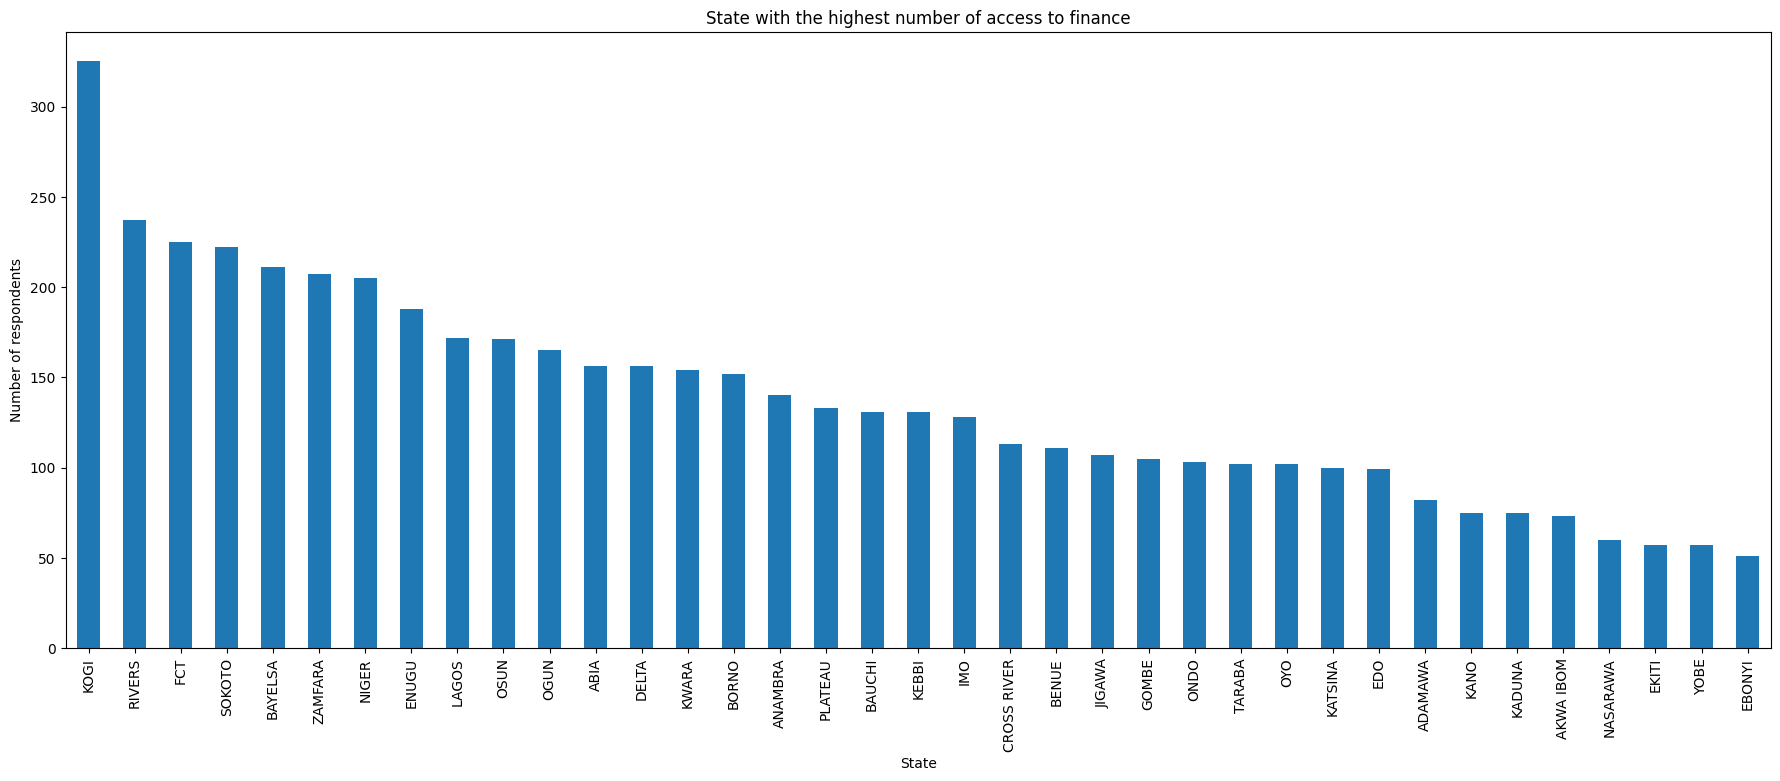

In [16]:
## plot a graph for it
plt.figure(figsize=(22, 8))
df[df['finhealth_access'] == 1]['state'].value_counts().plot(kind='bar')
plt.title('State with the highest number of access to finance')
plt.xlabel('State')
plt.ylabel('Number of respondents')
plt.show()

In [17]:
## which state have the highest number of no access to finance
df[df['finhealth_access'] == 0]['state'].value_counts()

,count
state,
EBONYI,733
NASARAWA,725
EKITI,723
ADAMAWA,706
YOBE,705
AKWA IBOM,700
KADUNA,699
KATSINA,688
EDO,678


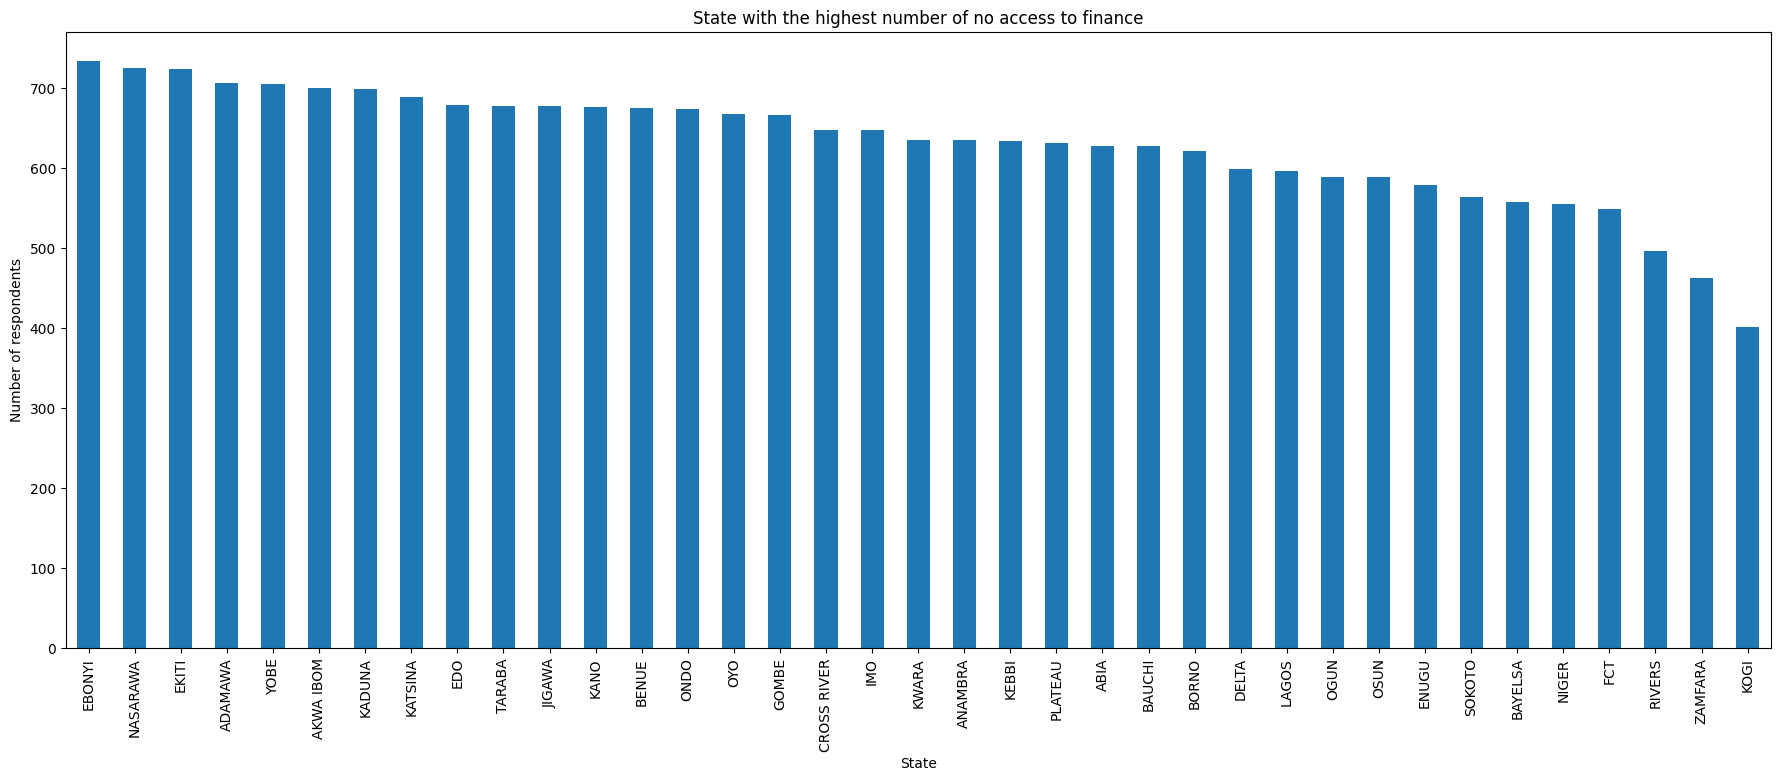

In [18]:
## plot a graph
plt.figure(figsize=(22, 8))
df[df['finhealth_access'] == 0]['state'].value_counts().plot(kind='bar')
plt.title('State with the highest number of no access to finance')
plt.xlabel('State')
plt.ylabel('Number of respondents')
plt.show()

In [19]:
## top 10 landmark with the highest access to finance
df[df['finhealth_access'] == 1]['landmark'].value_counts().head(10)


,count
landmark,
Blessed And Precious Children Academy School F.H.A,14
Mrs Filling Station In A.Y.A. Asokoro,14
"Emila Chasser House, River Park Estate, Lugbe",14
Okemagba High School Ijebu Ode - Epe Road Odo Ajogun Epe Lagos,14
"Mr Promise Wodo Nwobueze, Egbere, Ibaa Town",14
Agberi Mosque Apaso Area,14
Mtn Office 1St Avenue F.H.A Lugbe,14
"Baba Raw Power Fire,Ile Funfun.",13
"No. 7Nwaji Str, Citadel Of Learees School Asaba",13


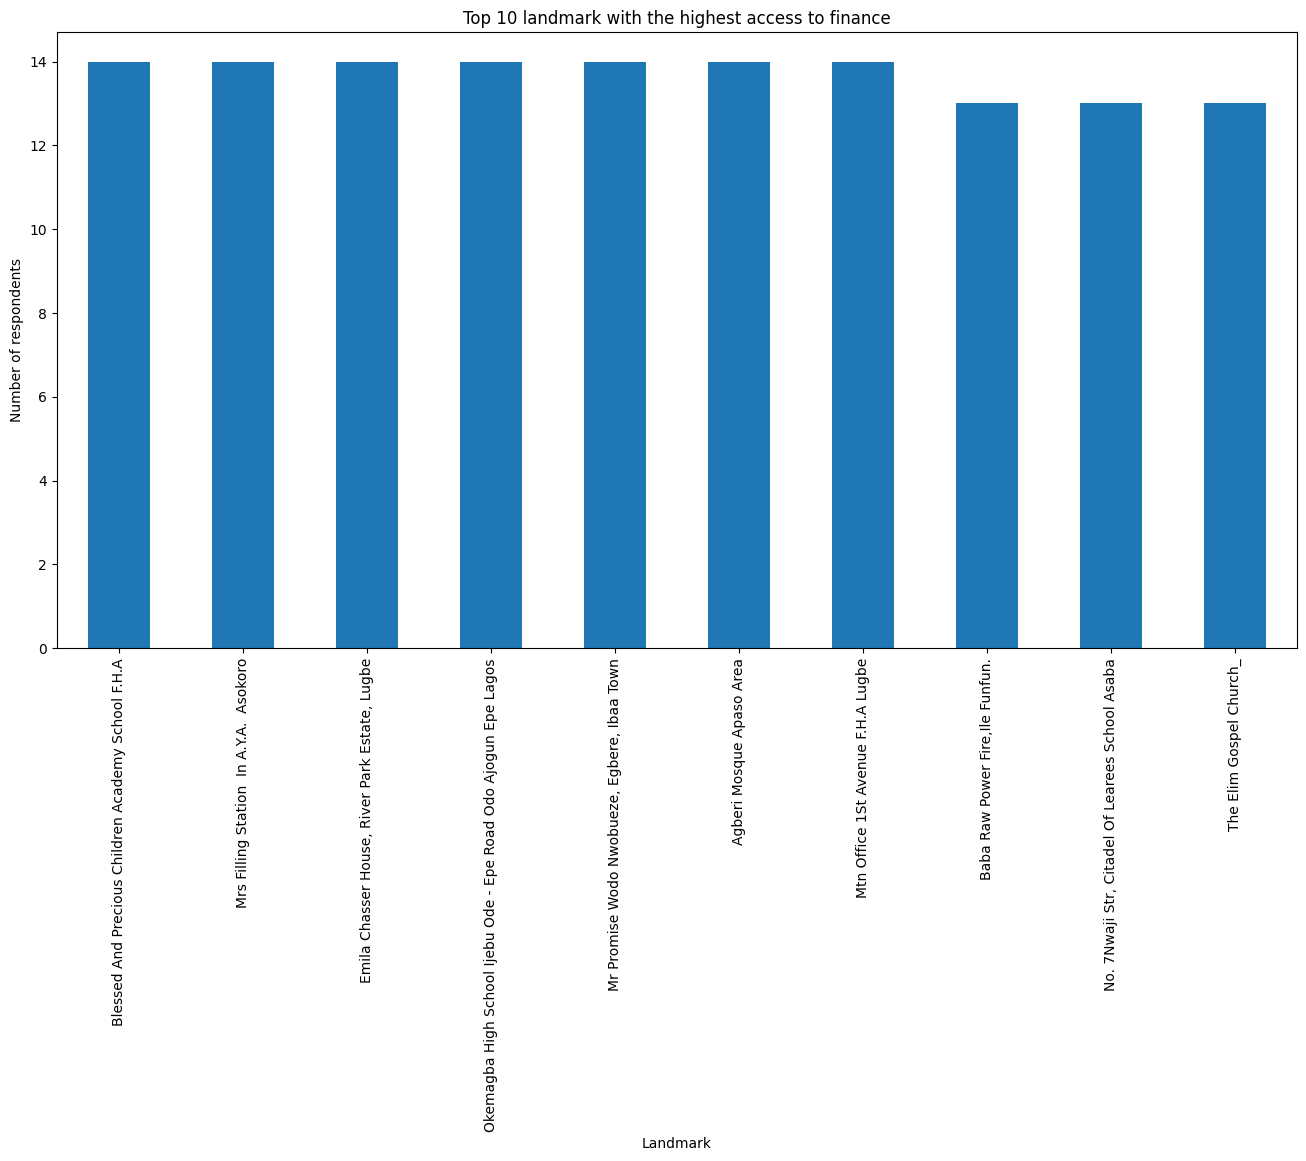

In [20]:
## plot a graph
plt.figure(figsize=(16, 8))
df[df['finhealth_access'] == 1]['landmark'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 landmark with the highest access to finance')
plt.xlabel('Landmark')
plt.ylabel('Number of respondents')
plt.show()

In [21]:
## which state are these landmarks
df[df['finhealth_access'] == 1][['state', 'landmark']].value_counts().head(10)

state   landmark                                                      
FCT     Blessed And Precious Children Academy School F.H.A                14
        Mrs Filling Station  In A.Y.A.  Asokoro                           14
        Emila Chasser House, River Park Estate, Lugbe                     14
        Mtn Office 1St Avenue F.H.A Lugbe                                 14
OSUN    Agberi Mosque Apaso Area                                          14
LAGOS   Okemagba High School Ijebu Ode - Epe Road Odo Ajogun Epe Lagos    14
RIVERS  Mr Promise Wodo Nwobueze, Egbere, Ibaa Town                       14
OSUN    Baba Raw Power Fire,Ile Funfun.                                   13
DELTA   No. 7Nwaji Str, Citadel Of Learees School Asaba                   13
FCT     Ggss (Ramatu House)Hostel                                         13
Name: count, dtype: int64

In [22]:
## top 10 landmark with no access to finance
df[df['finhealth_access'] == 0]['landmark'].value_counts().head(10)


,count
landmark,
Gidan Ridi,62
Angwan Yerima,46
Ebira Camp 1 (Ekeke Era),41
Sarkin Gum,39
Alhaji Dorai,37
Alap-Mbong,30
Angwan Sauka Kokona,29
Ago Paanu,28
International Gospels Libration Church Bariki Lissa,27


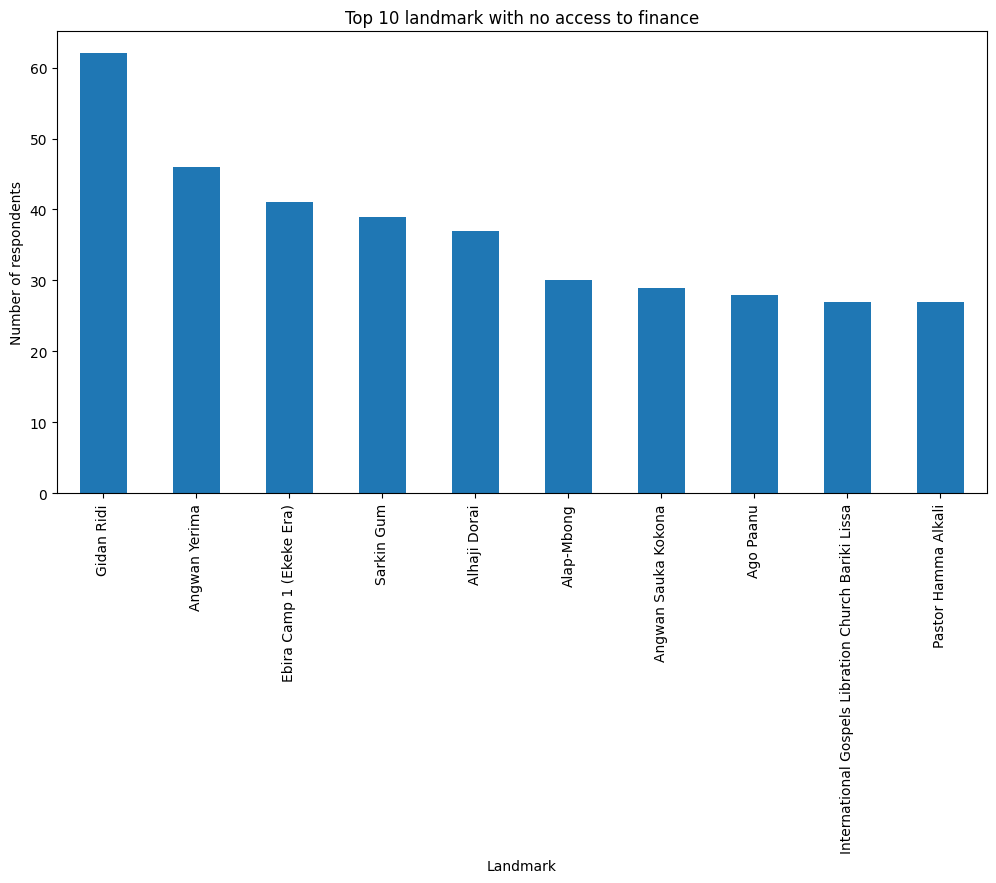

In [23]:
## plot a graph
plt.figure(figsize=(12, 6))
df[df['finhealth_access'] == 0]['landmark'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 landmark with no access to finance')
plt.xlabel('Landmark')
plt.ylabel('Number of respondents')
plt.show()

In [24]:
## what states are these landmark
df[df['finhealth_access'] == 0][['state', 'landmark']].value_counts().head(10)

state        landmark                                           
NASARAWA     Gidan Ridi                                             62
             Angwan Yerima                                          46
EDO          Ebira Camp 1 (Ekeke Era)                               41
BAUCHI       Sarkin Gum                                             39
TARABA       Alhaji Dorai                                           37
CROSS RIVER  Alap-Mbong                                             30
NASARAWA     Angwan Sauka Kokona                                    29
KWARA        Ago Paanu                                              28
GOMBE        Pastor Hamma Alkali                                    27
TARABA       International Gospels Libration Church Bariki Lissa    27
Name: count, dtype: int64

## Feature Engineering

In [25]:
df.columns

Index(['e6', 'state', 'agegroup', 'age group', 'respondent_serial',
       'Weightingvariable', 'final_hh_wgt', 'lga_name', 'locality_name',
       'ea_name',
       ...
       'd1_house', 'd3_8_car', 'sa7b1_1', 'sa7b1_2', 'sa7b1_3', 'sa7b1_4',
       'sa7b1_5', 'sa7b1_6', 'have_investment', 'rm2b_insurance'],
      dtype='object', length=104)

In [26]:
## We are going to first remove the following columns: state, landmark, lga_name, respondent_serial, agegroup, ea_name
df.drop(['state', 'landmark', 'lga_name', 'respondent_serial', 'agegroup', 'ea_name','locality_name'], axis=1, inplace=True)
## we we now encode the age group column to binary
df['age group'] = df['age group'].apply(lambda x: 1 if x == '18-24' else 0)

In [27]:
## replace all the null values with 0
df.fillna(0, inplace=True)

In [28]:
## convert all object data types to one hot encoding

# Identify object-type columns
object_cols = df.select_dtypes(include='object').columns

# Convert object columns to dummy variables
df_dummies = pd.get_dummies(df, columns=object_cols, drop_first=True)*1

In [29]:
df_dummies.head()

,age group,fparticipants,banked,fas,wealthscore,fas_overlaps,saving_strand,credit_strand,remittances_strand,insurance_strand,investments_physical_assets,investments_capital_markets,mobile_money,financial_agents,transactional_acc,finhealth_spend,finhealth_save,finhealth_plan,finhealth_resilience,finhealth_access,finlit_control,finlit_planning,finlit_choice,finlit_knowledge,finneeds_goals,finneeds_liquidity_distress,finneeds_liquidity,finneeds_resilience,finneeds_tov_income,finneeds_tov_digitalincome,finneeds_tov_cashincome,finneeds_tov_remittances,finneeds_tov_digital_remittances,finneeds_tov_cash_remittances,finneeds_tov_merchant_digital_pa,finneeds_tov_digital,finneeds_transferofvalue,target_groups,savings_group,cooperative,village_comm_association,savings_thrift,finhealth_indicator_final,finlit_cap_final,te4a-phone_net,lc1_1,lc1_2,lc1_3,lc1_4,lc1_5,have_debt,sa7b1_1,sa7b1_2,sa7b1_3,sa7b1_4,sa7b1_5,sa7b1_6,have_investment,e6_2,e6_,e6_1,e6_2,Weightingvariable_83.02048492,Weightingvariable_90.62634277,Weightingvariable_130.8195801,Weightingvariable_169.6753998,Weightingvariable_179.6533508,Weightingvariable_180.9229889,Weightingvariable_191.8298645,Weightingvariable_195.3148651,Weightingvariable_215.3346252,Weightingvariable_221.1311646,Weightingvariable_229.0991974,Weightingvariable_233.0137024,Weightingvariable_236.1227722,Weightingvariable_237.5964661,Weightingvariable_243.7971039,Weightingvariable_244.528183,Weightingvariable_248.8068542,Weightingvariable_267.5229797,Weightingvariable_269.0014648,Weightingvariable_315.3495178,Weightingvariable_317.1575623,Weightingvariable_325.3062744,Weightingvariable_338.4251099,Weightingvariable_360.4095154,Weightingvariable_386.2427368,Weightingvariable_386.3504028,Weightingvariable_386.4543152,Weightingvariable_394.8345337,Weightingvariable_397.4970093,Weightingvariable_407.0767212,Weightingvariable_417.20578,Weightingvariable_420.6780396,Weightingvariable_437.2955017,Weightingvariable_440.9491882,Weightingvariable_444.9247742,Weightingvariable_456.1202698,Weightingvariable_459.9163818,Weightingvariable_467.3537598,Weightingvariable_472.570282,Weightingvariable_472.5873108,Weightingvariable_479.2752075,Weightingvariable_479.8522949,Weightingvariable_480.971405,Weightingvariable_496.1073914,Weightingvariable_501.2383728,Weightingvariable_506.7781372,Weightingvariable_529.1275635,Weightingvariable_530.3956909,Weightingvariable_531.2762451,Weightingvariable_539.7585449,Weightingvariable_539.7785034,Weightingvariable_544.8276367,Weightingvariable_548.9605103,Weightingvariable_554.4314575,Weightingvariable_556.1895752,Weightingvariable_557.0542603,Weightingvariable_557.2119141,Weightingvariable_560.7180786,Weightingvariable_561.6818237,Weightingvariable_568.5617065,Weightingvariable_571.9191895,Weightingvariable_572.3956909,Weightingvariable_574.272522,Weightingvariable_575.0288086,Weightingvariable_579.8145752,Weightingvariable_580.6717529,Weightingvariable_587.5181274,Weightingvariable_596.7434082,Weightingvariable_598.1517334,Weightingvariable_616.5613403,Weightingvariable_619.7050171,Weightingvariable_621.6287231,Weightingvariable_621.692749,Weightingvariable_629.7055054,Weightingvariable_630.9311523,Weightingvariable_632.5847778,Weightingvariable_633.9692993,Weightingvariable_635.4868774,Weightingvariable_637.1893311,Weightingvariable_639.0394287,Weightingvariable_639.2455444,Weightingvariable_665.1750488,Weightingvariable_668.4650879,Weightingvariable_670.8621216,Weightingvariable_671.5042725,Weightingvariable_671.7699585,Weightingvariable_675.7173462,Weightingvariable_677.2141724,Weightingvariable_680.0614624,Weightingvariable_685.7213135,Weightingvariable_686.6538086,Weightingvariable_690.9872437,Weightingvariable_700.0767212,Weightingvariable_701.616333,Weightingvariable_704.4654541,Weightingvariable_718.6134033,Weightingvariable_721.4156494,Weightingvariable_723.5062866,Weightingvariable_724.0020752,Weightingvariable_724.4382935,Weightingvariable_727.2616577,Weightingvariable_741.

In [30]:
## isolate the target variable
y = df_dummies['finhealth_access']
## drop the target variable from the dummy data
df_dummies.drop('finhealth_access', axis=1, inplace=True)

In [31]:
## We can now normalize the data with a standardscaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_dummies)
df_scaled = pd.DataFrame(df_scaled, columns=df_dummies.columns)

In [32]:
# df_scaled.head()

## Feature Selection using PCA

In [33]:
## use PCA to select the best features for the model
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(df_scaled)

In [36]:
# exporting the PCA datasets so that I don't have to run it again
pd.DataFrame(X_pca).to_csv("X_pca.csv", index=False)

I tried 10, 20, 50 100

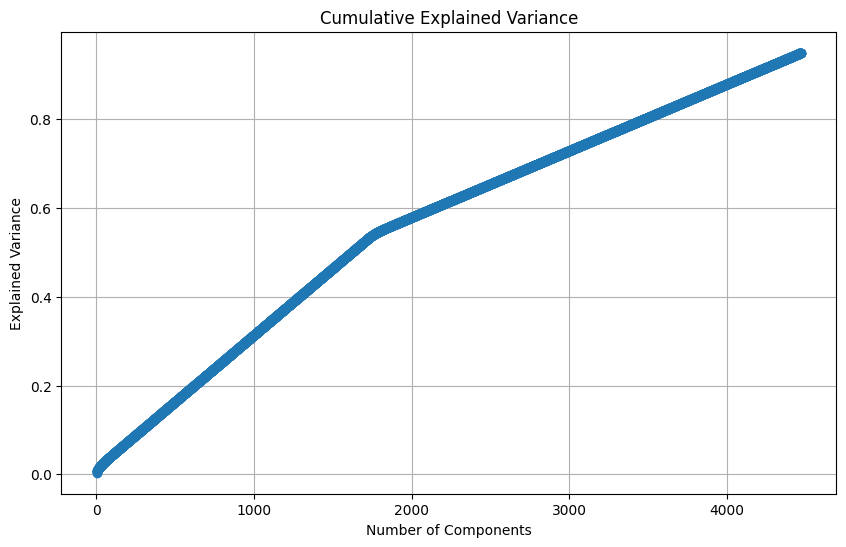

In [34]:
## how much variance each component capture

plt.figure(figsize=(10,6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance")
plt.grid(True)
plt.show()

## Model Training

In [37]:
##Split the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [38]:
## fitting the model, and printing the accuracy score.
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
print("Accuracy:", clf.score(X_test, y_test))

Accuracy: 0.8325409403063919


## Model evaluation

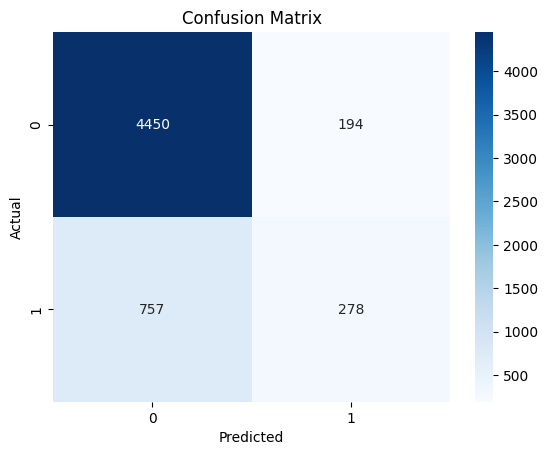

In [40]:
## evaluate the model include a confusion matrix display
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [43]:
## let's apply hyper paremeter tuning
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100,110,120],
    'max_depth': [10,15,20],
    'min_samples_split': [2,3,4],
    'min_samples_leaf': [1,2,3]
}
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


KeyboardInterrupt: 

I ran the grid search hyper paramenter tuning for approximately 3 hours but could not return, so I have to abort it due to time efficiency, to be able to submit before deadline.

In [45]:
## use xgboost model
xgb = xgb.XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy:", accuracy_xgb)

Accuracy: 0.8457474907554147


In [46]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91      4644
         1.0       0.63      0.36      0.46      1035

    accuracy                           0.85      5679
   macro avg       0.75      0.66      0.69      5679
weighted avg       0.83      0.85      0.83      5679



## Model selection

In [49]:
## print a classification report

results = []
## append f1_score, precision, recall and accuracy
results.append({'model':'Random Forest', 'f1_score': f1_score(y_test, y_pred), 'precision': precision_score(y_test, y_pred), 'recall': recall_score(y_test, y_pred), 'accuracy': accuracy_score(y_test, y_pred)})
results.append({'model':'XGBoost', 'f1_score': f1_score(y_test, y_pred_xgb), 'precision': precision_score(y_test, y_pred_xgb), 'recall': recall_score(y_test, y_pred_xgb), 'accuracy': accuracy_score(y_test, y_pred_xgb)})
##bresults.append({'model':'Grid Search', 'f1_score': f1_score(y_test, y_pred), 'precision': precision_score(y_test, y_pred), 'recall': recall_score(y_test, y_pred), 'accuracy': accuracy_score(y_test, y_pred)})



In [51]:
results_df = pd.DataFrame(results).sort_values(by='f1_score', ascending=False)
results_df

,model,f1_score,precision,recall,accuracy
1,XGBoost,0.461916,0.634064,0.363285,0.845747
0,Random Forest,0.368945,0.588983,0.268599,0.832541


XGBoost outperformed the Random Forest model across all key evaluation metrics, achieving an F1-score of 0.46 compared to 0.37, precision of 0.63 vs. 0.59, recall of 0.36 vs. 0.27, and accuracy of 0.85 against 0.83. While XGBoost may still benefit from further hyperparameter tuning to optimize its predictive performance, it already demonstrates a clear advantage over Random Forest in handling the classification task effectively.

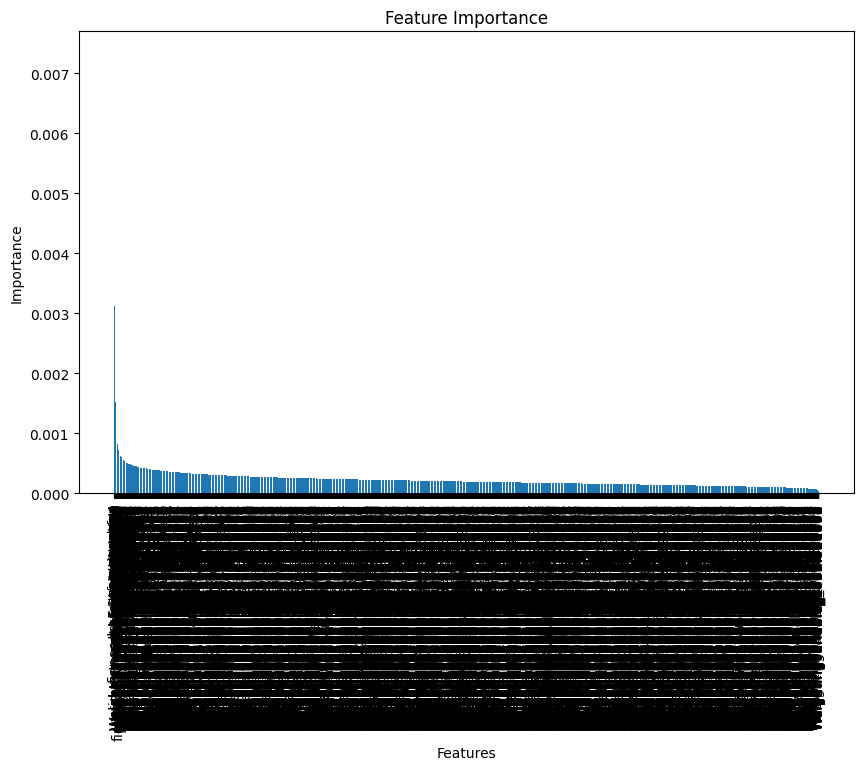

In [52]:
# create feature importance report
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = df_scaled.columns
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()


Thanks for stopping by.

**AY Khalid cares.**